### Question 1)
Read the given dataset as a dataframe and check for missing values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

jewels = pd.read_csv("jewel.csv")

if jewels.isnull().values.any() == False:
    print("There is no missing values in this dataset.")

There is no missing values in this dataset.


### Question 2)
Create line plots for 'y', 'z', 'depth', and 'table' attributes versus price separately in order to check for potential outliers.

<AxesSubplot:xlabel='price', ylabel='z'>

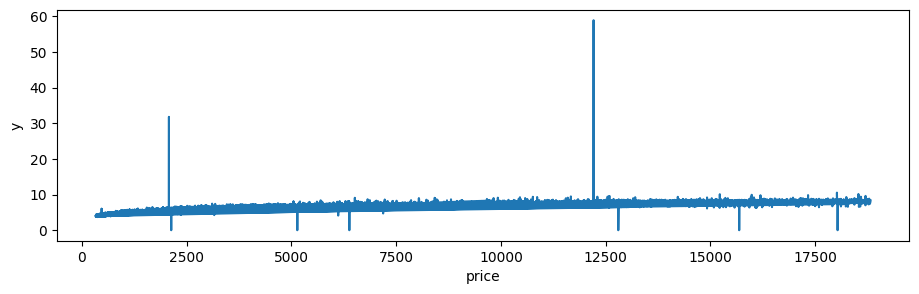

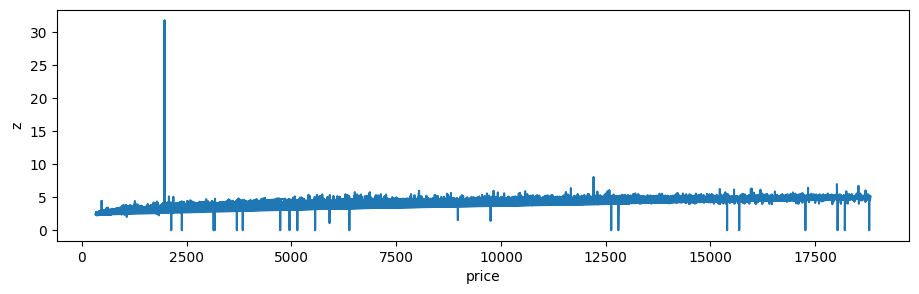

In [2]:
# Creating line plots for checking outliers

jewels.plot.line(x='price', y='y', xlabel="price", ylabel= "y", legend=False,figsize = (11,3))
jewels.plot.line(x='price', y='z', xlabel="price", ylabel= "z", legend=False,figsize = (11,3))

<AxesSubplot:xlabel='price', ylabel='table'>

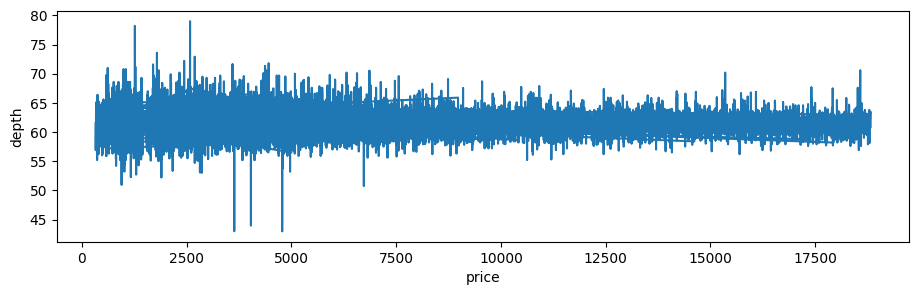

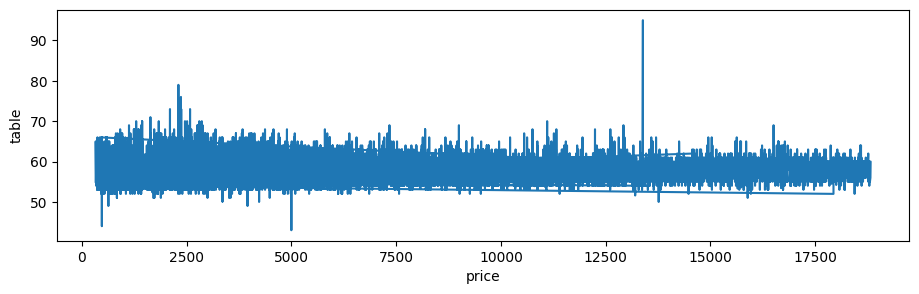

In [3]:
jewels.plot.line(x='price', y='depth', xlabel="price", ylabel= "depth", legend=False,figsize = (11,3))
jewels.plot.line(x='price', y='table', xlabel="price", ylabel= "table", legend=False,figsize = (11,3))

### Question 3)

Find and remove outliers by analyzing the above output of question 2. Explain your outlier detection process.

In [4]:
# for y values, there is just 2 values greater than 15 and some values lower than 2 so our interval is 2 < y < 15

# for z values, there is just a value greater than 10 and some values lower than 2 so our interval is 2 < z < 10

# for depth values, values around 80 are our upper outliers so our max limit is 75,
# there is a few values lower than 50 so our interval is 50 < depth < 75 

# for table values, the situation is very very similar to depth values so limits are same

jewels = jewels.loc[jewels['y'] < 15]
jewels = jewels.loc[jewels['y'] > 2]

jewels = jewels.loc[jewels['z'] < 10]
jewels = jewels.loc[jewels['z'] > 2]

jewels = jewels.loc[jewels['depth'] < 75]
jewels = jewels.loc[jewels['depth'] > 50]

jewels = jewels.loc[jewels['table'] < 75]
jewels = jewels.loc[jewels['table'] > 50]

<AxesSubplot:xlabel='price', ylabel='z'>

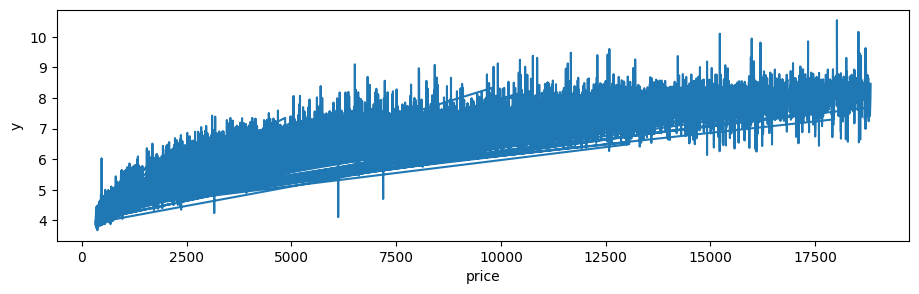

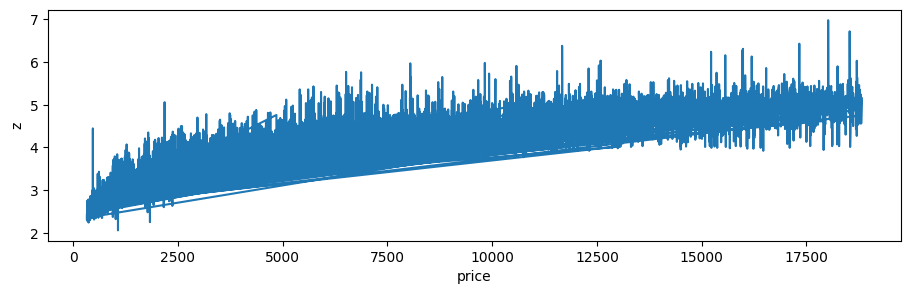

In [5]:
# Creating line plots after removing outliers

jewels.plot.line(x='price', y='y', xlabel="price", ylabel= "y", legend=False,figsize = (11,3))
jewels.plot.line(x='price', y='z', xlabel="price", ylabel= "z", legend=False,figsize = (11,3))

<AxesSubplot:xlabel='price', ylabel='table'>

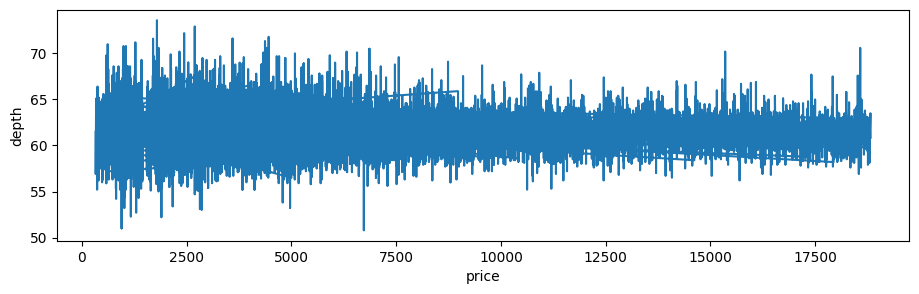

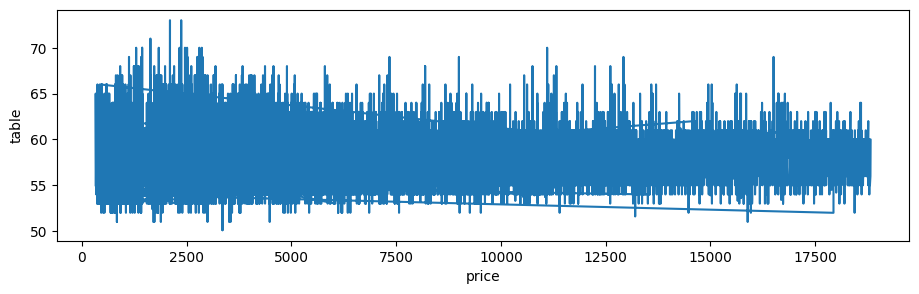

In [6]:
jewels.plot.line(x='price', y='depth', xlabel="price", ylabel= "depth", legend=False,figsize = (11,3))
jewels.plot.line(x='price', y='table', xlabel="price", ylabel= "table", legend=False,figsize = (11,3))

### Question 4)
Replace ordinal values (cut, color, clarity) according to rules below:
- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [7]:
jewels = jewels.replace(to_replace = ['Good', 'Very Good', 'Fair', 'Ideal', 'Premium'], value = [1, 2, 3, 4, 5])
jewels = jewels.replace(to_replace = ['J', 'I', 'H', 'G', 'F', 'E', 'D'], value = [1, 2, 3, 4, 5, 6, 7])
jewels = jewels.replace(to_replace = ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF'], value = [1, 2, 3, 4, 5, 6, 7, 8])
jewels

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,6,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,6,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,6,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,2,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,1,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,7,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,7,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,7,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,5,3,3,61.0,58.0,2757,6.15,6.12,3.74


### Question 5)
Create bar graphs for 'cut', 'color', and 'clarity' attributes with their new values to analyze the dataset visually.


<AxesSubplot:xlabel='Cut', ylabel='Frequency'>

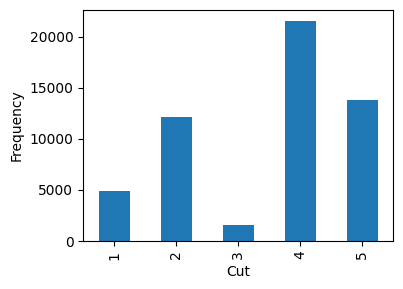

In [8]:
pd.pivot_table(data = jewels, index = 'cut', aggfunc = 'count')['x'].plot(
    kind = 'bar', xlabel = "Cut", ylabel = "Frequency", figsize = (4,3))

<AxesSubplot:xlabel='Color', ylabel='Frequency'>

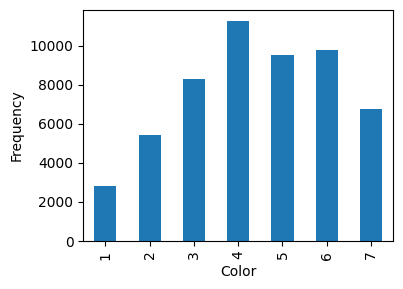

In [9]:
pd.pivot_table(data = jewels, index = 'color', aggfunc = 'count')['x'].plot(
    kind = 'bar', xlabel = "Color", ylabel = "Frequency", figsize = (4,3))

<AxesSubplot:xlabel='Clarity', ylabel='Frequency'>

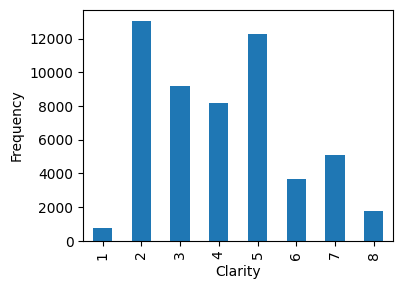

In [10]:
pd.pivot_table(data = jewels, index = 'clarity', aggfunc = 'count')['x'].plot(
    kind = 'bar', xlabel = "Clarity", ylabel = "Frequency", figsize = (4,3))

### Question 6)
Shuffle the data points and split the dataset into training and testing set, with a 0.7-0.3 ratio (training set will be %70, and test set will be %30 of the dataset) (Write your own shuffling and spliting code here, do not use predefined function train_test_split).



In [11]:
jewels = jewels.sample(frac=1)

train = jewels.iloc[:int(len(jewels) * 0.7)]
test = jewels.iloc[int(len(jewels) * 0.7):]

### Question 7)

Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Then, make prediction and calculate mean squared error (MSE). Calculate MSE for k value between 1-30 and print them. Finally, create elbow function to find best k value and plot the elbow curve. Explain how you find the best k-value.

MSE for k=1: 1166224.63
MSE for k=2: 939350.64
MSE for k=3: 880073.38
MSE for k=4: 846524.48
MSE for k=5: 831705.55
MSE for k=6: 827663.54
MSE for k=7: 827176.76
MSE for k=8: 832063.16
MSE for k=9: 832828.79
MSE for k=10: 846814.07
MSE for k=11: 854313.32
MSE for k=12: 858369.66
MSE for k=13: 864845.30
MSE for k=14: 873033.68
MSE for k=15: 885794.91
MSE for k=16: 892211.29
MSE for k=17: 899408.43
MSE for k=18: 907353.21
MSE for k=19: 914367.95
MSE for k=20: 924365.59
MSE for k=21: 931307.05
MSE for k=22: 941019.53
MSE for k=23: 949043.95
MSE for k=24: 957571.40
MSE for k=25: 962453.84
MSE for k=26: 971826.05
MSE for k=27: 979212.58
MSE for k=28: 986895.87
MSE for k=29: 991706.10
MSE for k=30: 998898.21

Best k value is: 7


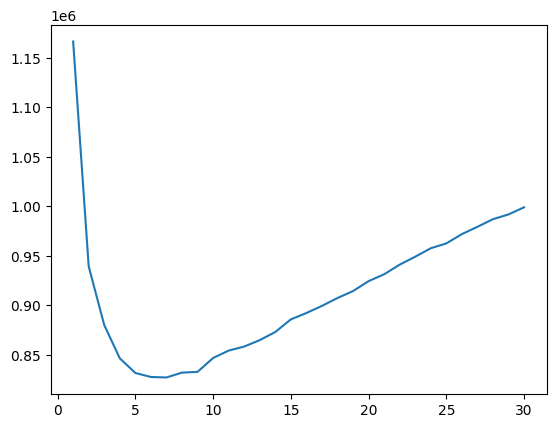

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_x = train.drop(["price"],axis=1)
train_y = train['price']
test_x = test.drop(["price"],axis=1)
test_y = test['price']
mse_values_list = []

for k in range(1,31):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_x, train_y)
    prediction = knn.predict(test_x)
    mse = mean_squared_error(y_true = test_y, y_pred = prediction)
    print(f'MSE for k={k}: {mse:.2f}')
    mse_values_list.append(mse)

plt.plot([i for i in range(1,31)], mse_values_list)

def elbow(mse_values):
    return mse_values.index(min(mse_values)) + 1

k = elbow(mse_values_list)
print(f'\nBest k value is: {k}')

# I created a list named 'mse_values_list' and added mse values to it in for loop to be able to find the minimum value.
# Then plotted the 'k' and 'mse' values curve. 
# Defined the function 'elbow' which returns the minimum of list.
# Then with using elbow function I get the best k value.

### Question 8)

Run 10-Fold Cross validation (CV) and print accuracy values for each run of CV. Also print the final average accuracy of the model.

In [13]:
from sklearn.model_selection import cross_val_score

knn2 = KNeighborsRegressor(n_neighbors = k)

accuracies = cross_val_score(knn2, train_x, train_y, cv=10)

for i in range(len(accuracies)):
    print(f'Accuracy for {i+1}. iteration:\t{accuracies[i]:.5f}')
print(f'\nAverage accuracy of the model:\t{np.mean(accuracies):.5f}')

Accuracy for 1. iteration:	0.95442
Accuracy for 2. iteration:	0.94399
Accuracy for 3. iteration:	0.94709
Accuracy for 4. iteration:	0.94778
Accuracy for 5. iteration:	0.94863
Accuracy for 6. iteration:	0.94672
Accuracy for 7. iteration:	0.95330
Accuracy for 8. iteration:	0.94320
Accuracy for 9. iteration:	0.95092
Accuracy for 10. iteration:	0.94283

Average accuracy of the model:	0.94789


### Question 9)

Predict the price of new jewel data with the following custom features. 

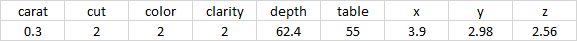

In [14]:
import warnings 
warnings.filterwarnings("ignore")

features = np.array([[0.3,2,2,2,62.4,55,3.9,2.98,2.56]])
features.reshape(1,-1)

knn3 = KNeighborsRegressor(n_neighbors = k)
knn3.fit(train_x,train_y)

prediction = knn3.predict(features)
print(f'Predicted price value:\t{float(prediction):.2f}')

Predicted price value:	469.86
